In [1]:
!python3 --version
!ls -al
!nvidia-smi

Python 3.11.9
total 148
drwxr-xr-x 5 1989098223 1954200513  4608 Nov 12 21:48 .
drwxr-xr-x 7 1989098223 1954200513  6144 Nov 12 00:26 ..
-rw-r--r-- 1 1989098223 1954200513 31179 Nov 11 23:35 cellCode.ipynb
-rw-r--r-- 1 1989098223 1954200513 23576 Nov 12 21:48 generate_dataset.ipynb
drwxr-xr-x 2 1989098223 1954200513  2560 Nov 12 20:04 .ipynb_checkpoints
-rw-r--r-- 1 1989098223 1954200513  8042 Nov 11 22:34 llama_3.2_lora.py
drwxr-xr-x 9 1989098223 1954200513  7680 Nov  4 17:12 llama-recipes
-rw-r--r-- 1 1989098223 1954200513  4583 Nov 12 13:32 ocrvqa_dataset.py
drwxr-xr-x 2 1989098223 1954200513  1024 Nov 12 13:53 __pycache__
-rw-r--r-- 1 1989098223 1954200513 21004 Nov 12 21:14 torch_run.ipynb
-rw-r--r-- 1 1989098223 1954200513  4444 Nov 12 21:12 web_scraper_dataset.py
Sat Nov 16 15:46:59 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.14              Driver Version: 550.54.14      CUDA Version: 12.4     |
|--

In [ ]:
%cd ~/git-repos/Visual-Data-Mining-AI-Model/training 

#! CUDA_VISIBLE_DEVICES=1 torchrun --nnodes 1 --nproc_per_node 1  llama-recipes/recipes/quickstart/finetuning/finetuning.py --enable_fsdp --lr 1e-5  --num_epochs 3 --batch_size_training 2 --model_name meta-llama/Llama-3.2-11B-Vision-Instruct --dist_checkpoint_root_folder ./finetuned_model --dist_checkpoint_folder fine-tuned  --use_fast_kernels --dataset "custom_dataset" --custom_dataset.test_split "test" --custom_dataset.file "web_scraper_dataset.py"  --run_validation True --batching_strategy padding  --use_peft --peft_method lora
#! CUDA_VISIBLE_DEVICES=1 torchrun --nnodes 1 --nproc_per_node 1  llama-recipes/recipes/quickstart/finetuning/finetuning.py --enable_fsdp --lr 1e-5  --num_epochs 3 --batch_size_training 2 --model_name meta-llama/Llama-3.2-11B-Vision-Instruct --dist_checkpoint_root_folder ./finetuned_model --dist_checkpoint_folder fine-tuned  --use_fast_kernels --dataset "custom_dataset" --custom_dataset.test_split "test" --custom_dataset.file "ocrvqa_dataset.py"  --run_validation True --batching_strategy padding  --use_peft --peft_method lora%cd ~/git-repos/Visual-Data-Mining-AI-Model/training 

!torchrun --nnodes 1 --nproc_per_node 4  finetuning.py --enable_fsdp --lr 1e-5  --num_epochs 3 --batch_size_training 8 --model_name meta-llama/Llama-3.2-11B-Vision-Instruct --dist_checkpoint_root_folder ./finetuned_model --dist_checkpoint_folder fine-tuned  --use_fast_kernels --dataset "custom_dataset" --custom_dataset.test_split "test" --custom_dataset.file "web_scraper_dataset.py"  --run_validation True --batching_strategy padding  --use_peft --peft_method lora
#! CUDA_VISIBLE_DEVICES=1 torchrun --nnodes 1 --nproc_per_node 1  finetuning.py --enable_fsdp --lr 1e-5  --num_epochs 3 --batch_size_training 2 --model_name meta-llama/Llama-3.2-11B-Vision-Instruct --dist_checkpoint_root_folder ./finetuned_model --dist_checkpoint_folder fine-tuned  --use_fast_kernels --dataset "custom_dataset" --custom_dataset.test_split "test" --custom_dataset.file "ocrvqa_dataset.py"  --run_validation True --batching_strategy padding  --use_peft --peft_method lora

/Users/924284072/git-repos/Visual-Data-Mining-AI-Model/training


/Users/924284072/git-repos/Visual-Data-Mining-AI-Model/venv_visual_data_mining/lib64/python3.11/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/Users/924284072/git-repos/Visual-Data-Mining-AI-Model/venv_visual_data_mining/lib64/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


W1116 20:49:22.579000 3113762 torch/distributed/run.py:793] 
W1116 20:49:22.579000 3113762 torch/distributed/run.py:793] *****************************************
W1116 20:49:22.579000 3113762 torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W1116 20:49:22.579000 3113762 torch/distributed/run.py:793] *****************************************
FINETUNING LOCAL
FINETUNING LOCAL
FINETUNING LOCAL
FINETUNING LOCAL
/Users/924284072/git-repos/Visual-Data-Mining-AI-Model/venv_visual_data_mining/lib64/python3.11/site-packages/llama_recipes/model_checkpointing/checkpoint_handler.py:17: DeprecationWarning: `torch.distributed._shard.checkpoint` will be deprecated, use `torch.distributed.checkpoint` instead
  from torch.distributed._shard.checkpoint import (
/Users/924284072/git-repos/Visual-Data-Mining-AI-Model

In [3]:
#display the format of the dataset

from datasets import load_dataset
from huggingface_hub import HfApi

# Load the original dataset
my_dataset = load_dataset("jwaters8978/web_scraper_dataset")
reference_dataset = load_dataset("HuggingFaceM4/the_cauldron", name="ocrvqa")

print(my_dataset)
print(reference_dataset)
print()

print(my_dataset.column_names)
print(reference_dataset.column_names)
print()

import pprint
pp = pprint.PrettyPrinter(indent=2)
print("My dataset first sample:")
pp.pprint(my_dataset['train'][0])
print("\nReference dataset first sample:")
pp.pprint(reference_dataset['train'][0])
print()

print(my_dataset['train'][0]['images'])
print(reference_dataset['train'][0]['images'])

print(type(my_dataset['train'][0]['images']))
print(type(reference_dataset['train'][0]['images']))


DatasetDict({
    train: Dataset({
        features: ['images', 'texts'],
        num_rows: 15937
    })
})
DatasetDict({
    train: Dataset({
        features: ['images', 'texts'],
        num_rows: 165746
    })
})

{'train': ['images', 'texts']}
{'train': ['images', 'texts']}

My dataset first sample:
{ 'images': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1280x720 at 0x7F5AC8207AD0>,
  'texts': [ { 'assistant': '[79.92, 7.64, 85.31, 10.42]',
               'source': 'web_scraper',
               'user': 'Return the bounding box of the Text link with the '
                       "words 'About Us'. It's used to navigate to the About "
                       'Us section of the website and if we click it the About '
                       'Us section will load.'}]}

Reference dataset first sample:
{ 'images': [ <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=380x500 at 0x7F5AC82654D0>],
  'texts': [ { 'assistant': 'David MACAULAY.',
               'source': 'ocrvqa',
 

In [3]:
#from datasets import load_dataset

#!python inference.py --model_name meta-llama/Llama-3.2-11B-Vision-Instruct --prompt_file prompt.txt --peft_model PATH/to/save/PEFT/model/ --use_auditnlg
#!wget --header="User-Agent: Mozilla/5.0" https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg -O kitty-cat.jpg

#my_dataset = load_dataset("jwaters8978/web_scraper_dataset")
#print(my_dataset['train'][0]['images'])
#print(my_dataset['train'][0]['texts'])

#!python multi_modal_infer.py --image_path kitty-cat.jpg --prompt_text "What is the bounding box for the kittens face?" --temperature 0.5 --top_p 0.8 --model_name "meta-llama/Llama-3.2-11B-Vision-Instruct" --peft_model_path "PATH/to/save/PEFT/model/"






Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Loading model and processor...


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

Loading PEFT model from PATH/to/save/PEFT/model/
Processing image...
Successfully loaded image from /tmp/tmpdmfeds_t.png
Generating text from image...
Generating response...

Generated Text:
--------------------------------------------------
end_header_id|>

[0.0, 0.0, 15.63, 11.11]<|eot_id|>
--------------------------------------------------


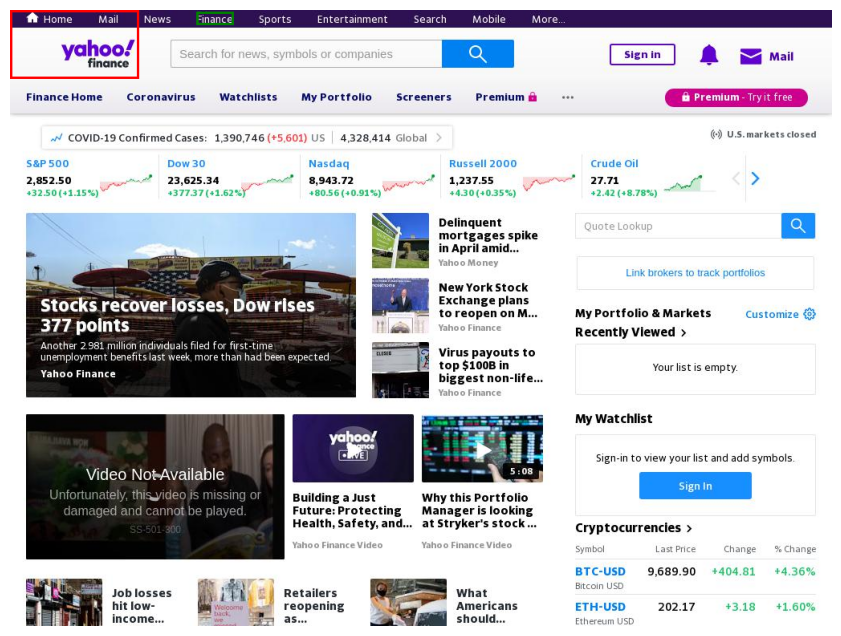

Loading model and processor...


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

Loading PEFT model from PATH/to/save/PEFT/model/
Processing image...
Successfully loaded image from /tmp/tmpwgqsc98n.png
Generating text from image...
Generating response...

Generated Text:
--------------------------------------------------
end_header_id|>

[31.25, 28.33, 35.31, 31.25]<|eot_id|>
--------------------------------------------------


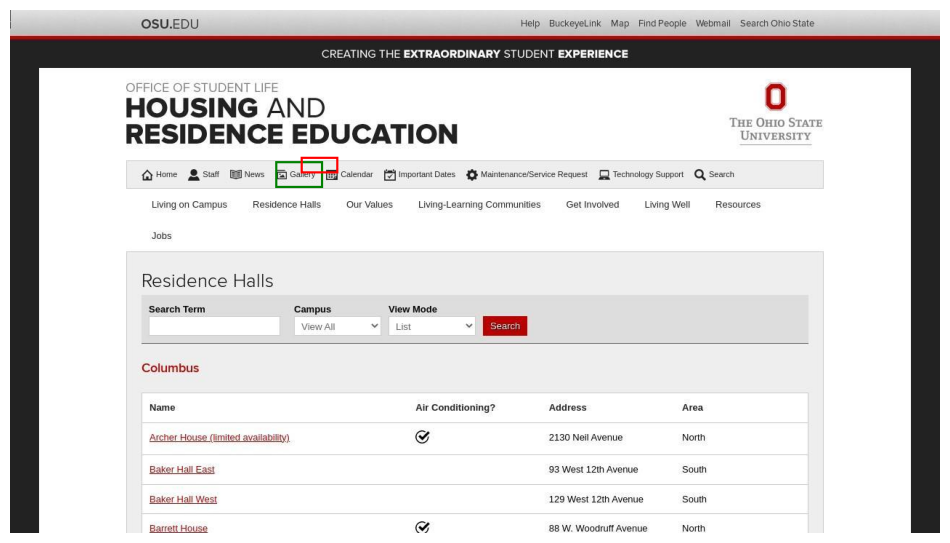

Loading model and processor...


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

Loading PEFT model from PATH/to/save/PEFT/model/
Processing image...
Successfully loaded image from /tmp/tmphiydcg5r.png
Generating text from image...
Generating response...

Generated Text:
--------------------------------------------------
end_header_id|>

[83.33, 89.58, 95.31, 92.19]<|eot_id|>
--------------------------------------------------


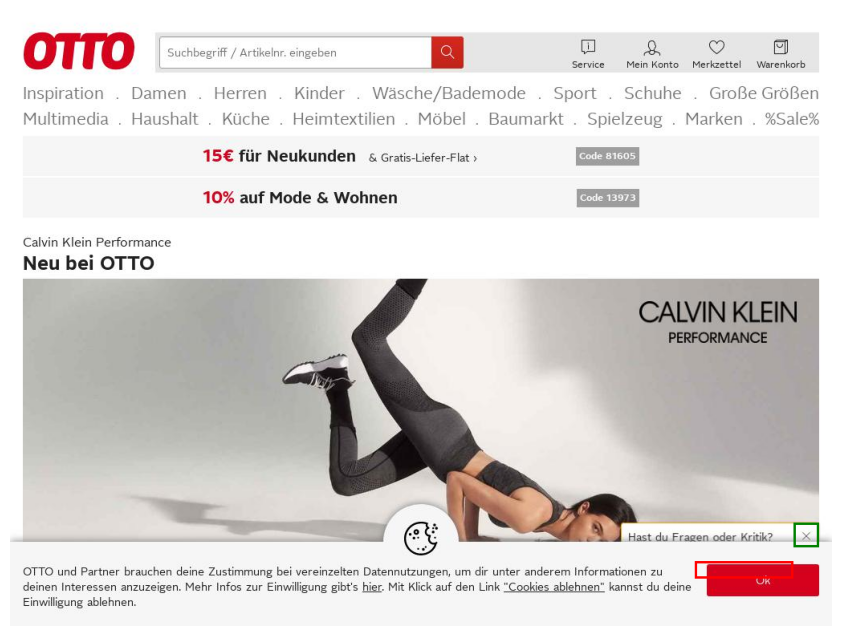

Loading model and processor...


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred: CUDA out of memory. Tried to allocate 112.00 MiB. GPU 0 has a total capacity of 79.14 GiB of which 34.75 MiB is free. Including non-PyTorch memory, this process has 79.10 GiB memory in use. Of the allocated memory 77.90 GiB is allocated by PyTorch, and 709.38 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)


SystemExit: 1

/Users/924284072/git-repos/Visual-Data-Mining-AI-Model/venv_visual_data_mining/lib64/python3.11/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
import tempfile
from datasets import load_dataset
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from multi_modal_infer import main

def convert_to_pixels(bbox, image_size):
   """Convert normalized bbox coordinates (percentage) to pixel coordinates"""
   x_res, y_res = image_size
   return [
       bbox[0] * x_res / 100,  # x1
       bbox[1] * y_res / 100,  # y1  
       bbox[2] * x_res / 100,  # x2
       bbox[3] * y_res / 100   # y2
   ]

my_dataset = load_dataset("jwaters8978/web_scraper_dataset")

index_to_test = 15900

for i in range(10):
    
    # Get the image and create drawing object
    image = my_dataset['train'][index_to_test]['images']
    draw = ImageDraw.Draw(image)
    
    # Save temp image for inference
    with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as tmp:
       image.save(tmp.name)
       prompt = my_dataset['train'][index_to_test]['texts'][0]['user']
       
       # Run inference and get raw prediction
       pred = main(tmp.name, prompt, 0.5, 0.8, "meta-llama/Llama-3.2-11B-Vision-Instruct", "PATH/to/save/PEFT/model/")
       os.remove(tmp.name)
    
    # Extract boxes from string format
    true_box = [float(x) for x in my_dataset['train'][index_to_test]['texts'][0]['assistant'].strip('[]').split(',')]
    true_box_pixels = convert_to_pixels(true_box, image.size)
    
    # Parse prediction
    pred_numbers = pred.split('|>')[1].split('<|')[0].strip()
    pred_box = [float(x) for x in pred_numbers.strip('[]').split(',')]
    pred_box_pixels = convert_to_pixels(pred_box, image.size)
    
    # Draw boxes
    draw.rectangle(true_box_pixels, outline='green', width=3)
    draw.rectangle(pred_box_pixels, outline='red', width=3)
    
    # Display
    plt.figure(figsize=(12,8))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    index_to_test = index_to_test + 1
